# Prediction of students' grades on the Alcohol Effects on Study dataset

It is the prediction of students' grades based on the Alcohol Effects on Study dataset. Dataset consists of both numerical and categorical data. Following methods are used: Linear Regression, Stochastic Gradient Descend Regression and Random Forest Regression.
Despite the grades being integers, I would argue that this task should be treated as a regression problem. The grades are supposed to measure students' knowledge and their discretization has only a purpose of making things easier, not to reflect the nature of the problem it operationalizes. 


#Downloading Dataset
Firstly, in order to download Alcohol Effects on Study dataset, we mount google drive and upload kaggle API.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files

Mounted at /content/gdrive


In [ ]:
files.upload() #this will prompt you to upload the kaggle.jso

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paulinakaczyska","key":"a590f81fa200cd408d5cb174df96882a"}'}

In [ ]:
  #make sure kaggle.json file is present
  !ls -lha kaggle.json

  #Install kaggle API client
  !pip install -q kaggle

  #kaggle API client expects the file to be in ~/.kaggle

  #so move it there
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  

-rw-r--r-- 1 root root 71 Oct 17 13:53 kaggle.json


In [ ]:
  #seting permissions
  !chmod 600 /root/.kaggle/kaggle.json

  #check your directory before downloading the datasets
  !pwd

/content


In [ ]:
#downloading
!kaggle datasets download -d whenamancodes/alcohol-effects-on-study

#unzipping
!unzip alcohol-effects-on-study.zip

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 16.9MB/s]
Archive:  alcohol-effects-on-study.zip
  inflating: Maths.csv               
  inflating: Portuguese.csv          


# Data Preprocessing

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
binary = ['school', 'sex', 'address', 'famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']
categorical_nb = ['Mjob', 'Fjob', 'reason', 'guardian']
numerical = ['Medu', 'Fedu','traveltime', 'studytime','failures','famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

The categorical data are one-hot encoded. Data is divided to input and output.

In [ ]:
math = pd.read_csv("Maths.csv", encoding = "UTF-8")
port = pd.read_csv("Portuguese.csv", encoding = "UTF-8")

math_i_c = pd.get_dummies(math[binary+categorical_nb],drop_first = True)
port_i_c = pd.get_dummies(port[binary+categorical_nb],drop_first = True)

math_o = math.iloc[:,-3:]
port_o = port.iloc[:,-3:]


Data is combined into input X and output Y arrays.

In [ ]:

math_array = pd.concat([math_i_c,math[numerical]],axis=1).to_numpy()
port_array = pd.concat([port_i_c,port[numerical]],axis=1).to_numpy()
X = np.concatenate((math_array,port_array),axis = 0)

math_array_o = math_o.to_numpy()
port_array_o = port_o.to_numpy()
Y = np.concatenate((math_array_o,port_array_o),axis = 0)


Division for test and train dataset is made using train_test_split from sklearn library.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=200, train_size=len(X)-200)

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

The performance is evaluated with Root Mean Square Error. MSE for grades for 1 period, second period and combined is as follows:

In [ ]:
np.sqrt(np.mean((y_test-reg.predict(X_test))**2, axis = 0))

array([2.60225035, 2.79040285, 3.55780419])

The predictions have smaller variance than the true values and are especially inaccurate for the smallest grades as can be seen on the figures below. Being closer to the middle grade skews prediction especially for the smallest and biggest grades. 

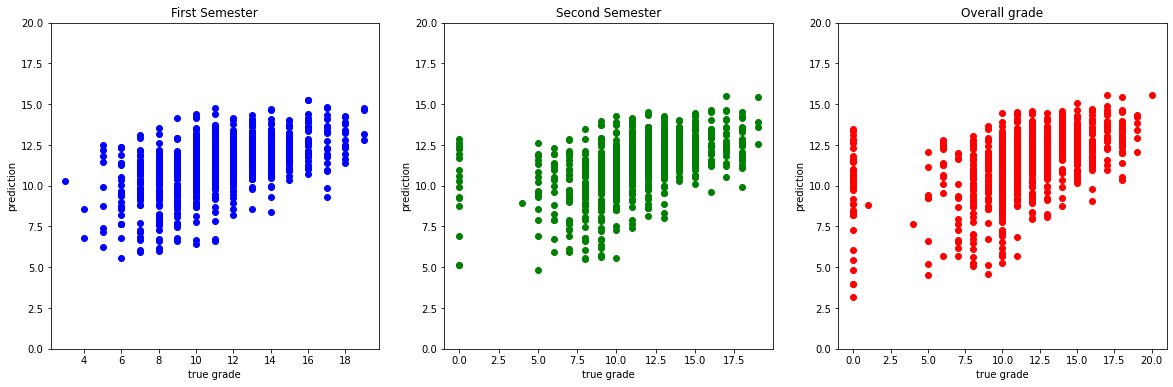

In [ ]:

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))

for ax in (ax1,ax2,ax3):
    ax.set(xlabel='true grade', ylabel='prediction')
ax1.set_title('First Semester')
ax1.set_ylim([0,20])
ax2.set_title('Second Semester')
ax2.set_ylim([0,20])
ax3.set_title('Overall grade')
ax3.set_ylim([0,20])

ax1.plot(y_train[:,0],reg.predict(X_train)[:,0],'bo')
ax2.plot(y_train[:,1],reg.predict(X_train)[:,1],'go')
ax3.plot(y_train[:,2],reg.predict(X_train)[:,2],'ro')

Prediction is however better than just returning the average grade for every student:

In [ ]:
np.sqrt(np.mean((y_test-np.mean(y_train))**2, axis = 0))

array([3.02424804, 3.15048111, 3.92930995])

#Stochastic Gradient Descent Regression

In [ ]:
 from sklearn.linear_model import SGDRegressor

In [ ]:
sgdr1 = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000).fit(X_train,y_train[:,0])
sgdr2 = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000).fit(X_train,y_train[:,1])
sgdr3 = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000).fit(X_train,y_train[:,2])

In [ ]:
print('RMSE for the first period',np.sqrt(np.mean((y_test[:,0]-sgdr1.predict(X_test))**2, axis = 0)))
print('RMSE for the second period',np.sqrt(np.mean((y_test[:,1]-sgdr2.predict(X_test))**2, axis = 0)))
print('RMSE for the whole period',np.sqrt(np.mean((y_test[:,2]-sgdr3.predict(X_test))**2, axis = 0)))


RMSE for the first period 2.735998482481249
RMSE for the second period 2.929316415012133
RMSE for the whole period 3.6762101070673276


Similar effects as with the linear regression also hold true for SGD, especially the tendention to give predictions closer to the middle values. The RMSE is slightly higher for SGD, but it is not visible on the plot.

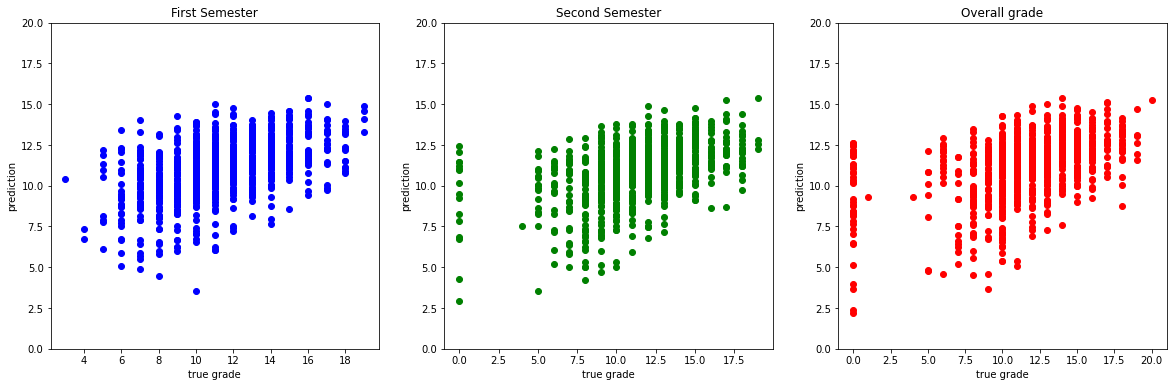

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))

for ax in (ax1,ax2,ax3):
    ax.set(xlabel='true grade', ylabel='prediction')
ax1.set_title('First Semester')
ax1.set_ylim([0,20])
ax2.set_title('Second Semester')
ax2.set_ylim([0,20])
ax3.set_title('Overall grade')
ax3.set_ylim([0,20])

ax1.plot(y_train[:,0],sgdr1.predict(X_train),'bo')
ax2.plot(y_train[:,1],sgdr2.predict(X_train),'go')
ax3.plot(y_train[:,2],sgdr3.predict(X_train),'ro')


#Random Forest

Next method is Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 300, max_depth=5, random_state=1)
forest = rfr.fit(X_train, y_train)

RMSE for grades for 1 period, second period and combined is as follows:

In [ ]:
np.sqrt(np.mean((y_test-forest.predict(X_test))**2, axis = 0))

array([2.53502971, 2.6208942 , 3.19362663])

The predictions are even closer to the middle value than in the previous cases. The effect is stronger for the 1st and 2nd semester. 

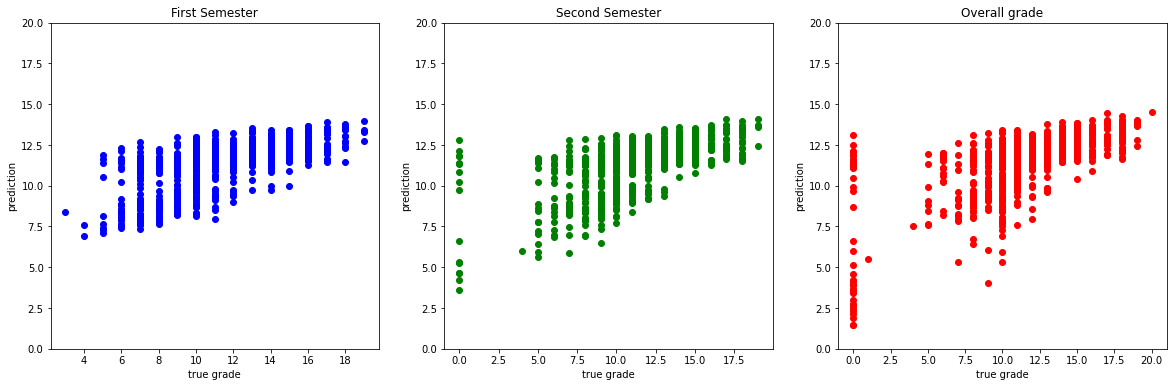

In [ ]:

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6))

for ax in (ax1,ax2,ax3):
    ax.set(xlabel='true grade', ylabel='prediction')
ax1.set_title('First Semester')
ax1.set_ylim([0,20])
ax2.set_title('Second Semester')
ax2.set_ylim([0,20])
ax3.set_title('Overall grade')
ax3.set_ylim([0,20])

ax1.plot(y_train[:,0],forest.predict(X_train)[:,0],'bo')
ax2.plot(y_train[:,1],forest.predict(X_train)[:,1],'go')
ax3.plot(y_train[:,2],forest.predict(X_train)[:,2],'ro')

# Comparison
All methods achieve similar results, although Random Forest is slightly better than the others. All methods are better than returning the average result. The error of prediction for the whole period is bigger than for the semesters. It is interesting, since, intuitively, long-term variables' effects should be more visible in the longer time horizon.